In [11]:
#EDA1
#1.What is the range of selling prices in the dataset?
from google.colab import files


uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [12]:
import pandas as pd

# Load the dataset
file_path = "BIKE DETAILS.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic dataset info
print(df.info())

# Summary statistics
print(df.describe())

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (tot

In [13]:
# Calculate range of selling prices
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
price_range = max_price - min_price

print(f"Minimum Selling Price: {min_price}")
print(f"Maximum Selling Price: {max_price}")
print(f"Range of Selling Prices: {price_range}")

Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of Selling Prices: 755000


In [14]:
#2. What is the median selling price for bikes in the dataset?
median_price = df["selling_price"].median()
print(f"Median Selling Price: {median_price}")

Median Selling Price: 45000.0


In [15]:
#3.What is the most common seller type?
seller_type_counts = df["seller_type"].value_counts()
most_common_seller_type = seller_type_counts.idxmax()
print(f"Most Common Seller Type: {most_common_seller_type}")

Most Common Seller Type: Individual


In [16]:
#4.How many bikes have driven more than 50,000 kilometers?
bikes_driven_above_50k = df[df["km_driven"] > 50000]
count_above_50k = len(bikes_driven_above_50k)
print(f"Number of Bikes Driven Above 50,000 Kilometers: {count_above_50k}")

Number of Bikes Driven Above 50,000 Kilometers: 170


In [17]:
#5.What is the average km_driven value for each ownership type?
avg_km_driven_by_ownership = df.groupby("owner")["km_driven"].mean()
print("Average km_driven by Ownership Type:")
print(avg_km_driven_by_ownership)

Average km_driven by Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [18]:
#6.What proportion of bikes are from the year 2015 or older?
bikes_from_2015_or_older = df[df["year"] >= 2015]
proportion_from_2015_or_older = len(bikes_from_2015_or_older) / len(df)
print(f"Proportion of Bikes from 2015 or Older: {proportion_from_2015_or_older:.2%}")


Proportion of Bikes from 2015 or Older: 52.78%


In [19]:
#7. What is the trend of missing values across the dataset?
missing_values_trend = df.isnull().sum() / len(df)
print("Trend of Missing Values:")
print(missing_values_trend)

Trend of Missing Values:
name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64


In [20]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = df["ex_showroom_price"].max()
bike_with_highest_price = df[df["ex_showroom_price"] == highest_ex_showroom_price]
print(f"Highest Ex-Showroom Price: {highest_ex_showroom_price}")
print("Bike with Highest Ex-Showroom Price:")
print(bike_with_highest_price)


Highest Ex-Showroom Price: 1278000.0
Bike with Highest Ex-Showroom Price:
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


In [21]:
#9. What is the total number of bikes listed by each seller type?
total_bikes_by_seller_type = df["seller_type"].value_counts()
print("Total Number of Bikes Listed by Seller Type:")
print(total_bikes_by_seller_type)


Total Number of Bikes Listed by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


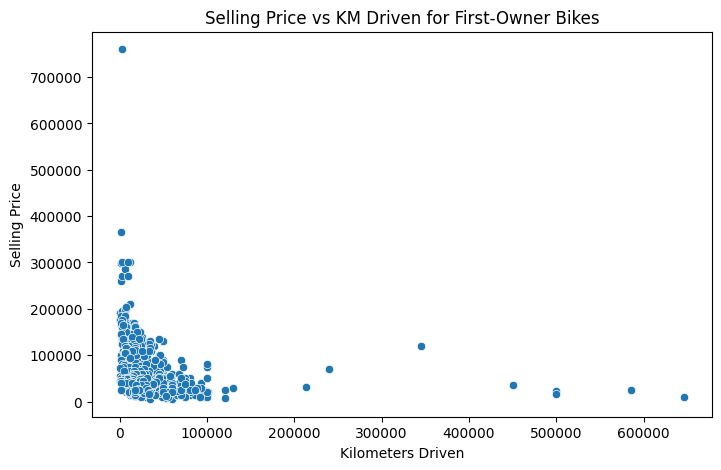

Correlation Coefficient: -0.24


In [23]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only first-owner bikes
df_first_owner = df[df["owner"] == "1st owner"]

# Scatter plot to visualize the relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_first_owner["km_driven"], y=df_first_owner["selling_price"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Selling Price vs KM Driven for First-Owner Bikes")
plt.show()

# Calculate correlation coefficient
correlation = df_first_owner["km_driven"].corr(df_first_owner["selling_price"])
print(f"Correlation Coefficient: {correlation:.2f}")

In [24]:
#11. Identify and remove outliers in the km_driven column using the IQR method.
import pandas as pd

# Compute Q1, Q3, and IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Display results
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Filtered dataset size: {df_filtered.shape[0]} rows")

# Save the cleaned dataset if needed
df_filtered.to_csv("cleaned_bike_details.csv", index=False)

Original dataset size: 1061 rows
Filtered dataset size: 1022 rows


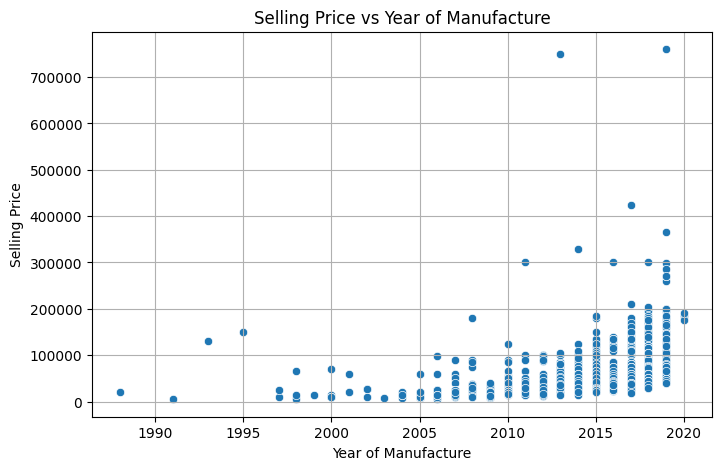

Correlation Coefficient: 0.40


In [25]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's already in df)
df.dropna(subset=["year", "selling_price"], inplace=True)  # Drop missing values

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["year"], y=df["selling_price"])
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Year of Manufacture")
plt.grid()
plt.show()

# Calculate correlation
correlation = df["year"].corr(df["selling_price"])
print(f"Correlation Coefficient: {correlation:.2f}")

In [26]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year)?
import pandas as pd

# Compute bike age
df["bike_age"] = 2025 - df["year"]

# Remove rows with missing ex_showroom_price
df_clean = df.dropna(subset=["ex_showroom_price"])

# Calculate depreciation
df_clean["depreciation"] = df_clean["ex_showroom_price"] - df_clean["selling_price"]

# Average depreciation per year
average_depreciation_per_year = df_clean["depreciation"].mean() / df_clean["bike_age"].mean()

print(f"Average Depreciation Per Year: ₹{average_depreciation_per_year:.2f}")

Average Depreciation Per Year: ₹2795.53


<ipython-input-26-b5071e14bd34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["depreciation"] = df_clean["ex_showroom_price"] - df_clean["selling_price"]


In [27]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
import pandas as pd

# Compute average selling price per year
avg_price_per_year = df.groupby("year")["selling_price"].mean()

# Identify bikes priced significantly above average (1.5 times the average)
df_above_avg = df[df.apply(lambda row: row["selling_price"] > 1.5 * avg_price_per_year[row["year"]], axis=1)]

# Display results
print(df_above_avg[["name", "year", "selling_price"]])

                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


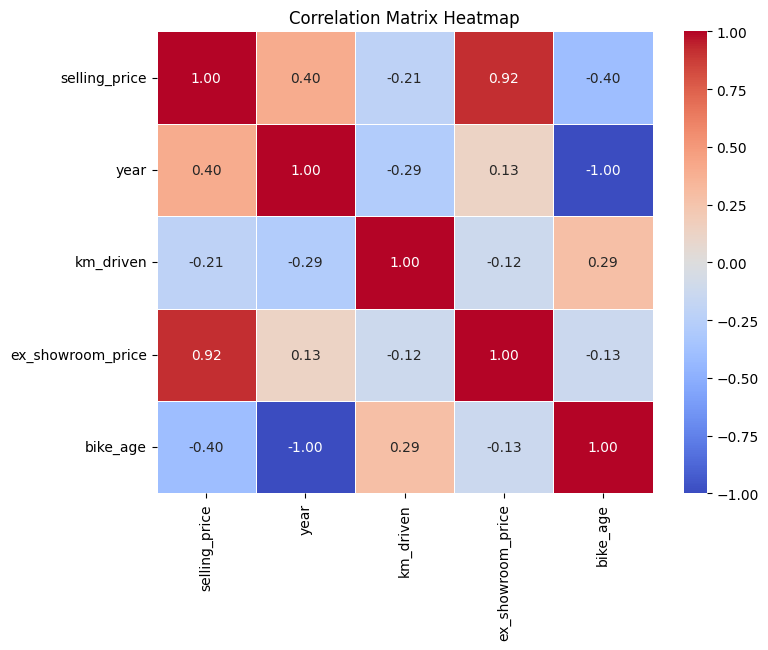

In [28]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (assuming it's already in df)
df_numeric = df.select_dtypes(include=["number"])  # Select only numeric columns

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()